In [45]:
from sklearn import datasets
import xgboost as xgb
import pandas as pd
data = pd.read_csv("parkinsons.data")

In [46]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [47]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [48]:
cols = list(data)
cols.insert(24, cols.pop(cols.index('status')))
data = data.loc[:, cols]

In [49]:
X,y = data.iloc[:,1:-1],data.iloc[:,-1]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [51]:
D_train = xgb.DMatrix(X_train, label = y_train)
D_test = xgb.DMatrix(X_test,label=y_test)

In [52]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
56,110.417,131.067,103.370,0.00784,0.00007,0.00352,0.00514,0.01056,0.03715,0.334,...,0.02802,0.06097,0.00969,21.422,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
141,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,0.571,...,0.04464,0.12047,0.04238,15.648,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723
170,244.990,272.210,239.170,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
66,140.341,159.774,67.021,0.00817,0.00006,0.00430,0.00440,0.01289,0.03198,0.313,...,0.02428,0.05490,0.02183,19.560,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156


In [53]:
param = {
    'eta':0.2,
    'learning_rate':0.3,
    'max_depth':5,
    'objective':'multi:softprob',
    'alpha':10,
    'num_class':4
}
epochs = 40

In [54]:
model = xgb.train(param,D_train,epochs)

In [56]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
pred = model.predict(D_test)
best_pred = np.asarray([np.argmax(line) for line in pred])
print("Precision : {}".format(precision_score(y_test,best_pred,average='macro')))
print("Accuracy : {}".format(accuracy_score(y_test,best_pred)*100))

Precision : 0.8888888888888888
Accuracy : 94.87179487179486


In [57]:
best_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [58]:
pred

array([[0.09538554, 0.79685235, 0.05388108, 0.05388108],
       [0.14898057, 0.7089328 , 0.07104331, 0.07104331],
       [0.6787211 , 0.17284721, 0.07421587, 0.07421587],
       [0.5255295 , 0.25526386, 0.10960332, 0.10960332],
       [0.03736373, 0.9204244 , 0.02110591, 0.02110591],
       [0.3445798 , 0.5780015 , 0.03870937, 0.03870937],
       [0.04304246, 0.90833014, 0.02431369, 0.02431369],
       [0.07360569, 0.8454522 , 0.04047104, 0.04047104],
       [0.12001651, 0.75693595, 0.06152374, 0.06152374],
       [0.07516454, 0.84777266, 0.0385314 , 0.0385314 ],
       [0.41098732, 0.41758344, 0.08571464, 0.08571464],
       [0.11798383, 0.7522727 , 0.06487174, 0.06487174],
       [0.62293243, 0.24083644, 0.06811556, 0.06811556],
       [0.3109763 , 0.58766913, 0.05067725, 0.05067725],
       [0.03736373, 0.9204244 , 0.02110591, 0.02110591],
       [0.7013957 , 0.16064836, 0.068978  , 0.068978  ],
       [0.05178337, 0.8897142 , 0.02925123, 0.02925123],
       [0.04304246, 0.90833014,

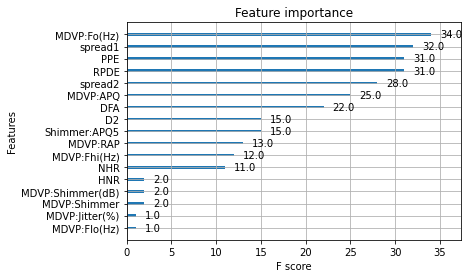

In [41]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [14, 5]
plt.show()